In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.2,
                                    rotation_range=20,
                                    zoom_range=0.4)

test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_set = train_datagen.flow_from_directory('dataset/Training/',
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='binary',
                                            )
test_set = test_datagen.flow_from_directory('dataset/Validation/',
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='binary')                                        


Found 1940 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from livelossplot import PlotLossesKeras
from tensorflow.keras.applications import VGG16,ResNet50V2

In [34]:
model_tl = VGG16(weights='imagenet',
                include_top=False,
                pooling=None,
                input_shape=(128,128,3))

model_tl.trainable = False

In [35]:
x = model_tl.output
x = Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(32,activation='relu')(x)
x = Dropout(0.25)(x)
end = Dense(1,activation='sigmoid')(x)

model = Model(inputs=model_tl.input,outputs=end)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [42]:
callback = [EarlyStopping(patience=2,
                            monitor='val_accuracy'),
            PlotLossesKeras()]

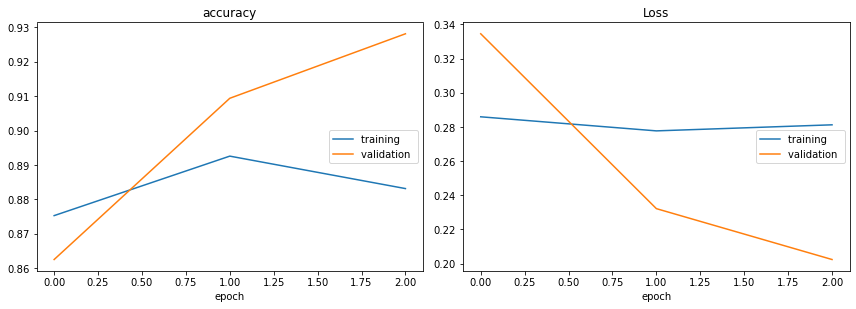

accuracy
	training         	 (min:    0.875, max:    0.893, cur:    0.883)
	validation       	 (min:    0.863, max:    0.928, cur:    0.928)
Loss
	training         	 (min:    0.278, max:    0.286, cur:    0.281)
	validation       	 (min:    0.202, max:    0.334, cur:    0.202)
60/60 [==============================] - 258s 4s/step - loss: 0.2804 - accuracy: 0.8831 - val_loss: 0.2024 - val_accuracy: 0.9281


In [43]:
h = model.fit(train_set,
                validation_data=test_set,
                epochs=3,
                steps_per_epoch=train_set.n//32,
                validation_steps=test_set.n//32,
                callbacks=callback)

In [47]:
train_set.class_indices

{'man': 0, 'woman': 1}

In [44]:
model.save('final_model.h5')

In [46]:
model.save('my_model/')

INFO:tensorflow:Assets written to: my_model/assets


In [3]:
from tensorflow.keras.models import load_model

In [4]:
model = load_model('final_model.h5')

In [5]:
model.save('Final_Model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Final_Model\assets
